<a href="https://colab.research.google.com/github/brian-ho/mde-preterm-2024/blob/main/day_1/notebooks/View_images_and_access_information.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# View images and access information: basic file browsing and image operations

```
2024 MDE Preterm
Brian Ho - brian@brian-ho.io
Jenny Fan - me@jennyfan.com
```

Some code to show how you can work with image files using using [PIL](https://pillow.readthedocs.io/en/stable/).

- Iterating over images with `os.listdir()`
- Viewing an image
- Viewing EXIF metadata

In [22]:
# Let's import our dependencies.
import os
from PIL import Image
from PIL.ExifTags import TAGS, GPSTAGS, IFD, Base
from pathlib import Path

In [27]:
# This gives us a set of image file extensions so we can identify the right files
IMAGE_FILE_EXTENSIONS = {
    ex.lower() for ex, f in Image.registered_extensions().items() if f in Image.OPEN
}
IMAGE_FILE_EXTENSIONS.add(".HEIC".lower())

In [ ]:
# When running on Colab, we can connect to a Google Drive folder
from google.colab import drive

drive.mount("/content/drive")

In [24]:
# Update the text in quotes with the path to your image data on Google Drive
# This will probably be something like: "/content/drive/MyDrive/path/to/folder"
# Don't forget to run this cell!
directory = "example_data"

In [25]:
# Now you can access the files in that folder
print(f'Listing files in "{directory}" ...')
for filepath in sorted(os.listdir(directory)):
    print(f" - {filepath}", end=""),

    # This filters out any unsupported non-image files
    if any(filepath.lower().endswith(ext) for ext in IMAGE_FILE_EXTENSIONS):
        print("... is an image!")
    else:
        print("... is not an image : (")

Listing files in "example_data" ...
 - .DS_Store... is not an image : (
 - IMG_5959.jpg... is an image!
 - image_001.jpeg... is an image!
 - image_002.jpeg... is an image!
 - image_003.jpeg... is an image!
 - image_004.jpeg... is an image!
 - image_005.jpeg... is an image!
 - image_006.jpeg... is an image!
 - image_007.jpeg... is an image!
 - image_008.jpeg... is an image!
 - image_009.jpeg... is an image!
 - image_010.jpeg... is an image!
 - image_011.jpeg... is an image!
 - image_012.jpeg... is an image!
 - image_013.jpeg... is an image!
 - image_014.jpeg... is an image!
 - image_015.jpeg... is an image!
 - image_016.jpeg... is an image!
 - image_017.jpeg... is an image!
 - image_018.jpeg... is an image!
 - image_019.jpeg... is an image!
 - image_020.jpeg... is an image!
 - image_021.jpeg... is an image!
 - image_022.jpeg... is an image!
 - image_023.jpeg... is an image!
 - image_024.jpeg... is an image!
 - image_025.jpeg... is an image!
 - image_026.jpeg... is an image!
 - image_027

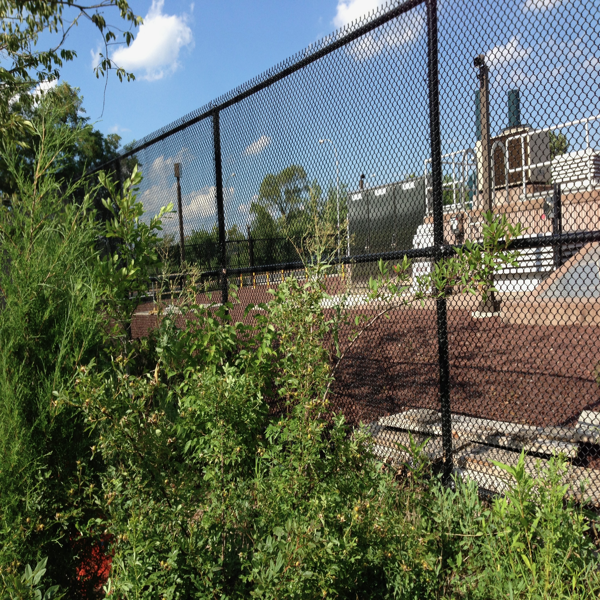

In [26]:
# Let's view the last file in the directory
# This creates a PIL Image object we can open
img = Image.open(Path(directory) / "image_001.jpeg")

# View the image at defined size
img.resize((600, 600))

In [20]:
def print_exif_info(img_file):
    """A helper function that prints EXIF information."""

    print(f"\n===== EXIF Metadata for {img_file} =====")

    # Create a PIL Image object
    img = Image.open(img_file)

    # Get the EXIF metadata
    img_exif = img.getexif()

    # This for loop iterates over img_exif
    # img_exif is a dictionary — a set of key-value pairs
    # items() returns each pair one at a time
    for exif_tag, exif_value in img_exif.items():
        print(TAGS.get(exif_tag, exif_tag), exif_value)

    # In addition the base EXIF data, we can look for more IFDs
    # These are Image File Directories, and provide more info
    for ifd_id in IFD:
        # Not all images will have all IFDs!
        # The try here lets us view this info only if it exists
        try:
            ifd = img_exif.get_ifd(ifd_id)
            print(f"\n----- {ifd_id.name} -----")

            if ifd_id == IFD.GPSInfo:
                resolve = GPSTAGS
            else:
                resolve = TAGS

            for tag, value in ifd.items():
                tag_name = resolve.get(tag, tag)
                print(tag_name, value)

        except KeyError:
            pass

In [21]:
# Let's try to view the EXIF data for an image
print_exif_info(Path(directory) / "image_001.jpeg")


===== EXIF Metadata for example_data/image_001.jpeg =====
GPSInfo 690
ResolutionUnit 2
ExifOffset 204
Make Apple
Model iPhone 5
Software 6.1.4
Orientation 1
DateTime 2013:08:02 16:18:40
YCbCrPositioning 1
XResolution 72.0
YResolution 72.0

----- Exif -----
ExifVersion b'0221'
ComponentsConfiguration b'\x01\x02\x03\x00'
ShutterSpeedValue 9.944303797468354
DateTimeOriginal 2013:08:02 16:18:40
DateTimeDigitized 2013:08:02 16:18:40
ApertureValue 2.5260688216892597
BrightnessValue 8.956842105263158
MeteringMode 5
FlashPixVersion b'0100'
Flash 16
FocalLength 4.13
ColorSpace 1
ExifImageWidth 3264
FocalLengthIn35mmFilm 33
SceneCaptureType 0
OffsetTime -04:00
OffsetTimeOriginal -04:00
OffsetTimeDigitized -04:00
SubsecTime 000
SubjectLocation (1631, 1223, 881, 881)
SubsecTimeOriginal 000
SubsecTimeDigitized 000
ExifImageHeight 2448
SensingMethod 2
ExposureTime 0.0010152284263959391
FNumber 2.4
ExposureProgram 2
ISOSpeedRatings 50
ExposureMode 0
WhiteBalance 0

----- GPSInfo -----
GPSLatitudeRef